#imports

In [ ]:
import tweepy
import time
import csv
import os
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive')

In [ ]:
os.getcwd()

'/content/drive/MyDrive'

In [ ]:
#os.listdir()

#twitter api

In [ ]:
#client = tweepy.Client(bearer_token='AAAAAAAAAAAAAAAAAAAAAP%2FUjAEAAAAAwN32tAj9XbqUL4z2tN%2BOifedeTs%3Dyz1pbZKBreSE8VqzRARcOYQjyGuXURrZNrbx2MuDQo4CNLGI2u')
twitter_keys = {
        'consumer_key':        '4RLGTBpgutMh3P3d6KGhcYuhs',
        'consumer_secret':     'qyVBsMUTWMdASsUnBlYeKE7KITgPrkCf6JVK5tA5jujVJb1KTr',
        'access_token_key':    '1572990615536783363-rVUf9DOFsLRiiRWWQr5BA3GCzcBdID',
        'access_token_secret': 'PJSUirEQBH01a5mudR9MfnJfZYY7PzRJ9HTD8SYLjXXkG'
    }




#Setup access to API
auth = tweepy.OAuthHandler(twitter_keys['consumer_key'], twitter_keys['consumer_secret'])
auth.set_access_token(twitter_keys['access_token_key'], twitter_keys['access_token_secret'])
api = tweepy.API(auth)

# workflow to show how the number of tweets change over time for the providung hashtags

In [ ]:
lis=list()
with open('extracted_tweets_dataset.csv','r',encoding='utf-8') as file:
    reader= csv.reader(file)
    for row in reader:
        #print(type(row[0]))
        lis.append(row[0][0:7])
        #new_s=row[0][0:10]


In [ ]:
lis.pop(0)

'timesta'

In [ ]:
lis.sort()

In [ ]:
len(lis)

247523

In [ ]:
from numpy.core.numeric import count_nonzero

j=0
counts_dic=dict()
for i in lis:
  j+=1
  if i not in counts_dic.keys():
      counts_dic[i]=lis.count(i)      
  if j%1000==0:
    print(f"{j} number of iteration")

In [ ]:
date=list(counts_dic.keys())
count=list(counts_dic.values())

In [ ]:
counts_dic

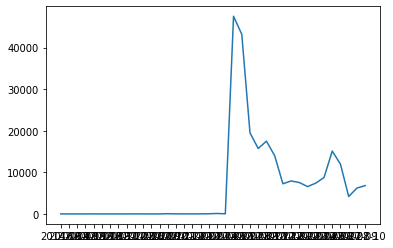

In [ ]:
from matplotlib import pyplot as plt
plt.plot(date,count)

In [ ]:
time

In [ ]:
len(count)

600

In [ ]:
j=0
new_c=list()
b_c=list()
for i in range(len(counts_dic)):
  if date[i]<"2021-06":
      b_c.append(count[i])
  elif new_c:
    new_c.append(count[i])
  else:
    new_c.append(sum(b_c[0:i]))
    new_c.append(count[i])


NameError: ignored

In [ ]:
new_c

[316,
 47541,
 43201,
 19493,
 15737,
 17494,
 13994,
 7246,
 7933,
 7546,
 6571,
 7410,
 8759,
 15112,
 11958,
 4187,
 6218,
 6807]

In [ ]:
len(b_c)

21

In [ ]:
print(len(new_c))
len(date[19:])
x_as=date[19:]
x_as.pop(0)
x_as[0]='2014-06 to 2021-05'
len(x_as)

0


NameError: ignored

In [ ]:
fig = plt.figure(figsize = (30, 5))
plt.bar(x_as,new_c, color ='b')
 
#plt.xlabel("Courses offered")
#plt.ylabel("No. of students enrolled")
plt.title("number of tweets over time wit respect to the provide Hashtags")
plt.show()



#plt.bar(range(len(new_c)),new_c)

NameError: ignored

2018-12-04 10:07:00


In [ ]:
"2018--04"<"2022-06-23"

True

#provide a workflow to get plot the trend of the hashtags over time.
get count over month for now


In [ ]:
#df = pd.read_csv('extracted_tweets_dataset.csv')

In [ ]:
df = pd.read_parquet('final_twitter_data.parquet')

In [ ]:
df.drop_duplicates(subset=['tweet_id'])

In [ ]:
#df.head()

In [ ]:
dates=list()

for row,record in enumerate(df.hashtags):
  if record!='[]'and df['timestamp'][row][0:7]>'2021-05' : 
    dates.append(df['timestamp'][row][0:7])


In [ ]:
date=list()
for dt in dates:
  if dt not in date:
    date.append(dt)

In [ ]:
date.sort()
date

In [ ]:
date

In [ ]:
hashtaglist=["IchBinHanna","IchBinReyhan","IchBinJelena","IchBinMelek","IchBinHannaCH","IchBinHannaAT",\
"IchBinHannaInUK","IchWarHanna","HannasChef","WissZeitVG","95vsWissTeitVG","GegenWissZeitVG10",\
"ACertainDegreeofFlexibility","WissSystemFehler",\
"FristIsFrust","Dauerstellen","AcademicPrecarity" ,"stopprecarity"]

In [ ]:
#hashlis=list()
#for hash in hashtaglist:
#  hashlis.append(hash.lower())

In [ ]:
i=1
j=6
for i in range(1,3):
  for j in range(1,13):
    if i==1 and j>5 and j<10 or i==2 and j<10:
      globals()[f'hash202{i}_0{j}']=list()
      globals()[f'hash202{i}_0{j}'].extend([hash for row,hash in enumerate(df['hashtags']) if df['timestamp'][row][0:7]==f'202{i}-0{j}' and hash!='[]'])
        
    elif i==1 and j>5 and j>=10 or i==2 and j>=10:
      globals()[f'hash202{i}_{j}']=list()
      globals()[f'hash202{i}_{j}'].extend([hash for row,hash in enumerate(df['hashtags']) if df['timestamp'][row][0:7]==f'202{i}-{j}' and hash!='[]'])


In [ ]:
#preprocessing the hashtags list from specific periods
i=1
j=6
for i in range(1,3):
  for j in range(1,13):
    if i==1 and j>5 and j<10 or i==2 and j<10:
      globals()[f'all_hashtags_202{i}_0{j}']=list()
      for s in globals()[f'hash202{i}_0{j}']:
          bb=s.split(', ')
          a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
          globals()[f'all_hashtags_202{i}_0{j}'].extend(a)
        
        
    elif i==1 and j>5 and j>=10 or i==2 and j>=10:
      globals()[f'all_hashtags_202{i}_{j}']=list()
      for s in globals()[f'hash202{i}_{j}']:
          bb=s.split(', ')
          a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
          globals()[f'all_hashtags_202{i}_{j}'].extend(a)


In [ ]:
def hashtag_counter(hash_ls,txt):
  lis=list()
  for hashtag in hash_ls:
    lis.append(hashtag.lower())
  return lis.count(txt.lower())

In [ ]:
hashtag_counter(all_hashtags_2021_10,'IchbinHanna')

10323

In [ ]:
def hashtag_num_list(hashtag):
  hashtag_num=list()
  for dt in date:
      i,j = dt[3],dt[5:]
      lis = globals()[f'all_hashtags_202{i}_{j}']
      hashtag_num.append(hashtag_counter(lis,hashtag))
  return hashtag_num

In [ ]:
hashtag_num_list('IchbinHanna')

In [ ]:
#summ=np.sum([hashtag_num_list(i) for i in hashtaglist],axis=0)

# hashtags from the data set

In [ ]:
def hashtag_set_finder():
  hashtag_set=set()
  for dt in date:
      i,j = dt[3],dt[5:]
      lis = globals()[f'all_hashtags_202{i}_{j}']
      for i in lis:
        hashtag_set.add(i)
  return hashtag_set

In [ ]:
hashtags_in_DS=hashtag_set_finder()

In [ ]:
len(hashtags_in_DS)

8427

In [ ]:
hashtags_in_DS

In [ ]:
def generate_hashtags(dataset):
  listOfAllHashtags=list()
  for row, hash in enumerate(dataset.hashtags):
    if dataset['timestamp'][row][0:10]>="2021-06-01" and hash!='[]':
      bb=hash.split(', ') 
      
      a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
      listOfAllHashtags.extend(a)
  listOfAllHashtagsL=[i.lower() for i in listOfAllHashtags]
  return listOfAllHashtagsL
      #bb=[has.split(', ') for has in hash]
      #a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
      #globals()[f'all_hashtags_202{i}_0{j}'].extend(a)

In [ ]:
lis=generate_hashtags(df)

In [ ]:
len(lis)

408985

In [ ]:
lis.count('ichbinhanna')

206381

In [ ]:
lis

In [ ]:
l=[(i,lis.count(i)/len(lis)) for i in hashtags_in_DS if lis.count(i)>2000]

In [ ]:
l.sort(reverse=True , key= lambda k:k[1])

In [ ]:
l

[('ichbinhanna', 0.5046175287602235),
 ('wisszeitvg', 0.06530557355404232),
 ('ichbinreyhan', 0.042346296318935904),
 ('hannaimbundestag', 0.014861180727899556),
 ('dauerstellen', 0.014663129454625475),
 ('wisssystemfehler', 0.012149589838258127),
 ('wissenschaft', 0.011159333471887722),
 ('95vswisszeitvg', 0.010266880203430443),
 ('frististfrust', 0.007848698607528393),
 ('acertaindegreeofflexibility', 0.006579703412105578),
 ('berlhg', 0.005978214359939851),
 ('gegenwisszeitvg10', 0.005364499920534983)]

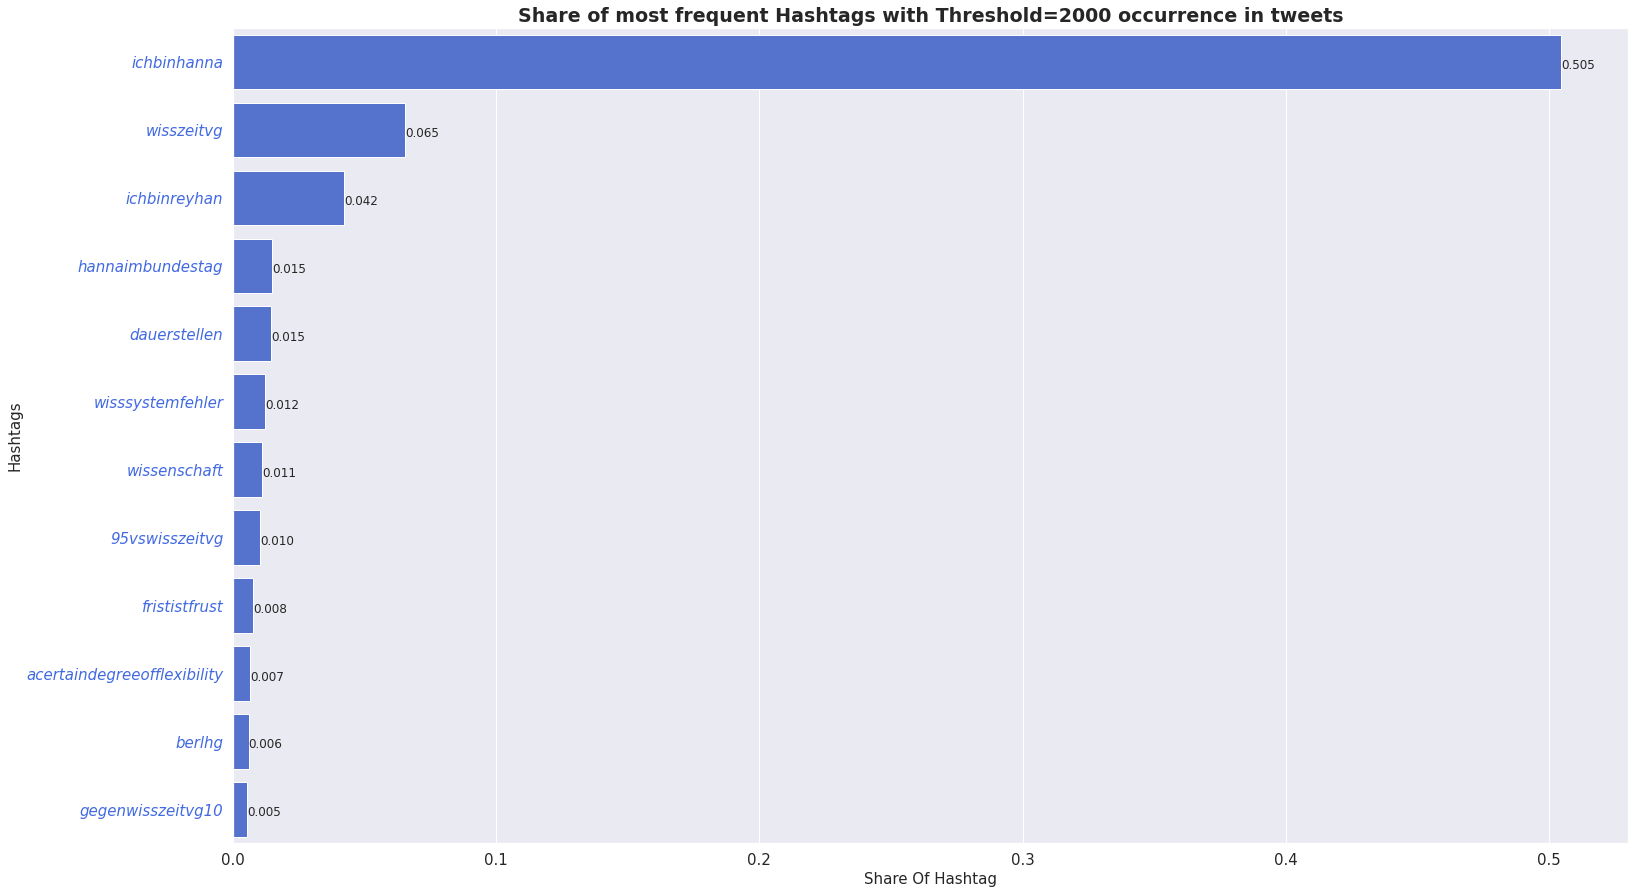

In [ ]:

sns.set(style="darkgrid")
hash=[i[0] for i in l]
share=[i[1] for i in l]
fig = plt.subplots(figsize =(25, 15))
ax = sns.barplot(y=hash,x=share,orient="h",color='royalblue' )
ax.set_title('Share of most frequent Hashtags with Threshold=2000 occurrence in tweets',fontsize=19,fontweight="bold");

#Set our x and y labels and adjust their size
ax.set_xlabel('Share Of Hashtag',fontsize=15)
ax.set_ylabel('Hashtags', fontsize=15)
plt.yticks(fontsize = 15,fontstyle="italic",color='royalblue')
plt.xticks(fontsize = 15)
initialx=0
for p in ax.patches:
  ax.text(p.get_width(),initialx+p.get_height()/8,"{:.3f}".format(p.get_width()))
  initialx+=1

#evolution of hashtags over time

plot for the frequent hashtags from the data set

In [ ]:
date2=list()
for row, i in enumerate(date):
  if row%3==0:
    date2.append(i)
  elif row <6:
    date2.append(f"0{row+6}")
  else:
    date2.append(f"0{row-6}")

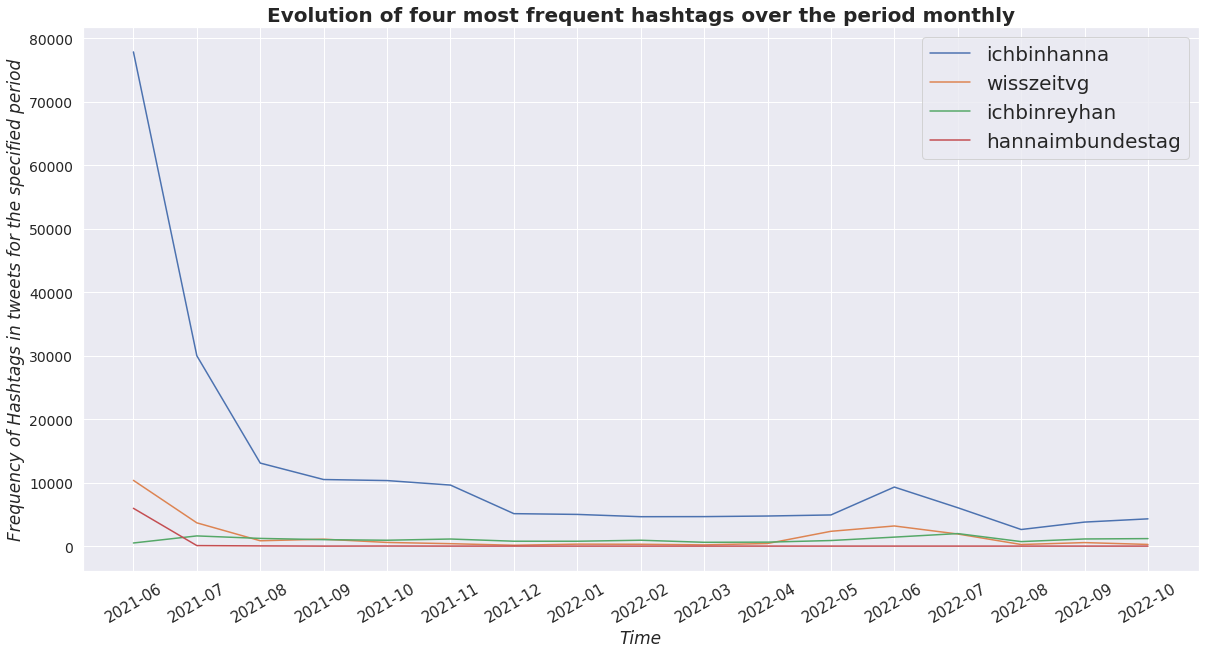

In [ ]:
hashlist_from_database=[i[0] for i in l][0:4]
#hashlist_from_database=hashlist_from_database[0:4]
fig = plt.figure(figsize = (20, 10))
for i in hashlist_from_database:
  plt.plot(date,hashtag_num_list(i))#/summ

plt.legend([j for j in hashlist_from_database ], fontsize=20) 
plt.xticks(fontsize = 15, rotation=30)
plt.yticks(fontsize = 14)

plt.xlabel("Time",fontsize = 17,fontstyle="italic")
plt.ylabel("Frequency of Hashtags in tweets for the specified period",fontsize = 17,fontstyle="italic")
plt.title("Evolution of four most frequent hashtags over the period monthly",fontsize = 20,fontweight="bold")
plt.show()



Text(0.5, 1.0, 'Evolution trend of four most frequent hashtags over the period (monthly)')

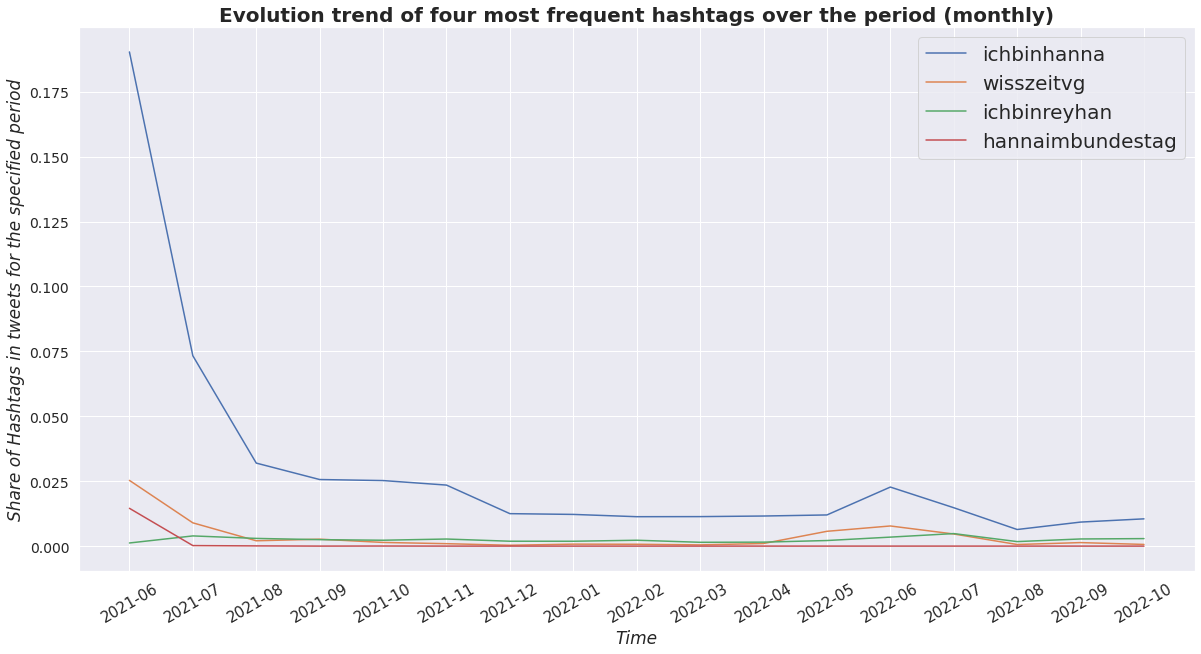

In [ ]:
%matplotlib inline
sns.set(style="darkgrid")
#hashlist_from_database=hashlist_from_database[0:4]
fig = plt.figure(figsize = (20, 10))
for i in hashlist_from_database:
  sns.lineplot(x=date,y=np.array(hashtag_num_list(i))/np.size(lis))#/summ

plt.legend([j for j in hashlist_from_database ], fontsize=20) 
plt.xticks(fontsize = 15, rotation=30)
plt.yticks(fontsize = 14)

plt.xlabel("Time",fontsize = 17,fontstyle="italic")
plt.ylabel("Share of Hashtags in tweets for the specified period",fontsize = 17,fontstyle="italic")
plt.title("Evolution trend of four most frequent hashtags over the period (monthly)",fontsize = 20,fontweight="bold")





# Tweet or retweet
developing of hashtags

In [ ]:
#df = pd.read_csv('extracted_tweets_dataset.csv')

In [ ]:
original=list()
retweet=list()

for row,record in enumerate(df.hashtags):
  if record!='[]'and df['tweet_type'][row]=='original' : 
    original.append(record)
  elif record!='[]'and df['tweet_type'][row]=='retweet' :
    retweet.append(record)

In [ ]:
retweet

In [ ]:
def hash_count2(ls,txt):
        b=list()
        for s in ls:
          bb=s.split(', ')
          a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
          b.extend(a)
        return hashtag_counter(b,txt)

In [ ]:
originals

tweet or retweets for hashtags from the Data set

In [ ]:

originals = [hash_count2(original,i[0]) for i in l]
retweets = [hash_count2(retweet,i[0]) for i in l]

In [ ]:
originals

[151804, 19263, 13861, 4614, 4897, 4267, 3235, 3492, 2862, 2603, 1713, 1718]

In [ ]:
hashii=[i[0] for i in l]


In [ ]:
p_orig=np.array(originals)/np.size(lis)
p_ret=np.array(retweets)/np.size(lis)

In [ ]:
p_orig=p_orig[0:4]
p_ret=p_ret[0:4]
hashii=hashii[0:4]

In [ ]:
hashii

['ichbinhanna', 'wisszeitvg', 'ichbinreyhan', 'hannaimbundestag']

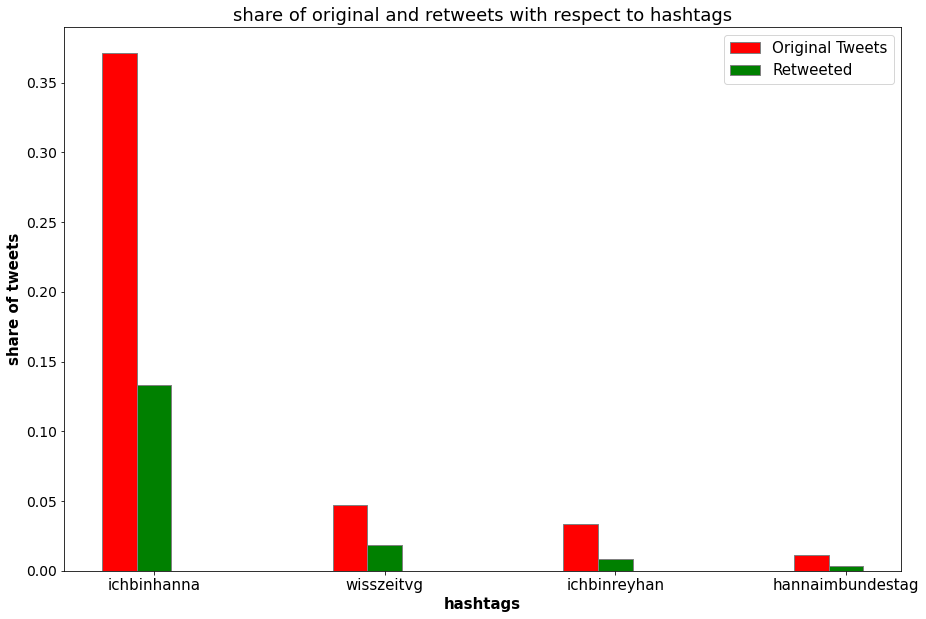

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
# set width of bar
barWidth = 0.15
fig = plt.subplots(figsize =(15, 10))
 
# set height of bar
#originals = [hash_count2(original,i) for i in hashtaglist]
#retweets = [hash_count2(retweet,i) for i in hashtaglist]

 
# Set position of bar on X axis
br1 = np.arange(4)
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, p_orig, color ='r', width = barWidth,
        edgecolor ='grey', label ='Original Tweets')
plt.bar(br2, p_ret, color ='g', width = barWidth,
        edgecolor ='grey', label ='Retweeted')

 
# Adding Xticks
plt.xlabel('hashtags', fontweight ='bold', fontsize = 15)
plt.ylabel('share of tweets', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(4)],
        hashii,fontsize = 15)

plt.yticks(fontsize = 14)
plt.title('share of original and retweets with respect to hashtags',fontsize = 18)

 
plt.legend(fontsize = 15)
plt.show()

#  frequent hashtags barchart

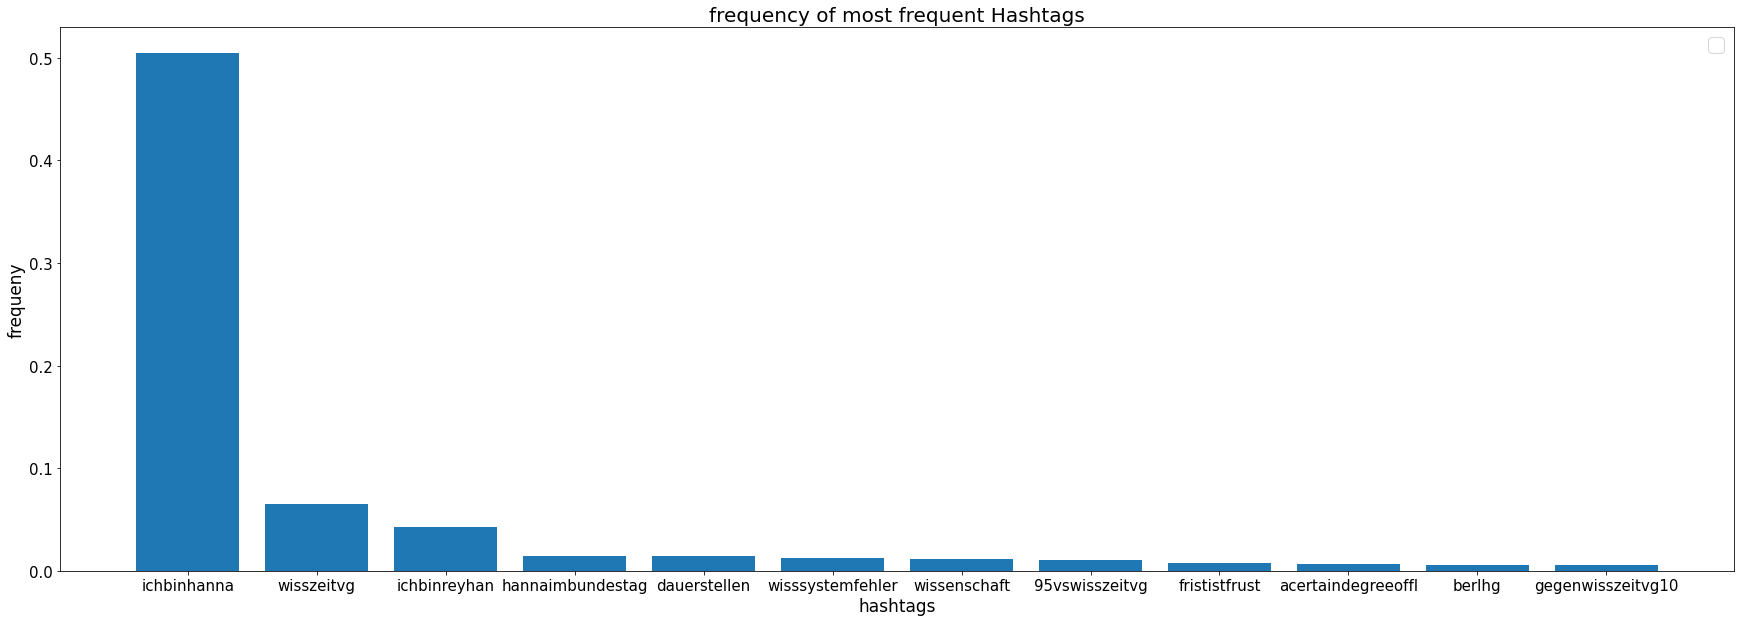

In [ ]:
fig = plt.subplots(figsize =(30, 10))
x=[i[0][0:18] for i in l]
y=[i[1] for i in l]
plt.bar(x,y)
plt.xticks(fontsize = 15,fontstretch=1000)
plt.yticks(fontsize = 15)
plt.legend(fontsize = 20)
#plt.xlabel("hashtags",fontsize = 20)
plt.title('frequency of most frequent Hashtags',fontsize = 20)
plt.xlabel("hashtags",fontsize = 17)
plt.ylabel("frequeny",fontsize = 17)
#plt.title("evolution of frequent hashtags over time",fontsize = 20)

plt.show()

#**CONCURRENCY hashtags**

In [ ]:
def coocuring_hashtags_with(dataset,hashtag):#,hashtag
  listOfAllHashtags=list()
  for row, hash in enumerate(dataset.hashtags):
    if dataset['timestamp'][row][0:10]>="2021-06-01" and hash!='[]':
      bb=hash.split(', ') 
      a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
      for i in range(len(a)):
        a[i]=a[i].lower()
      if hashtag in a and len(a)>1:  
        listOfAllHashtags.append(a)
  hashtgs=[]
  for i in listOfAllHashtags:
    hashtgs.extend(i)
  list_of_concurrent_hash=[(i,hashtgs.count(i)/len(listOfAllHashtags)) for i in hashtags_in_DS if hashtgs.count(i)>500 and i.lower()!=hashtag]

  

  return list_of_concurrent_hash


In [ ]:
e=coocuring_hashtags_with(df,"ichbinhanna")

In [ ]:
e.sort(reverse=True , key= lambda k:k[1])
#e

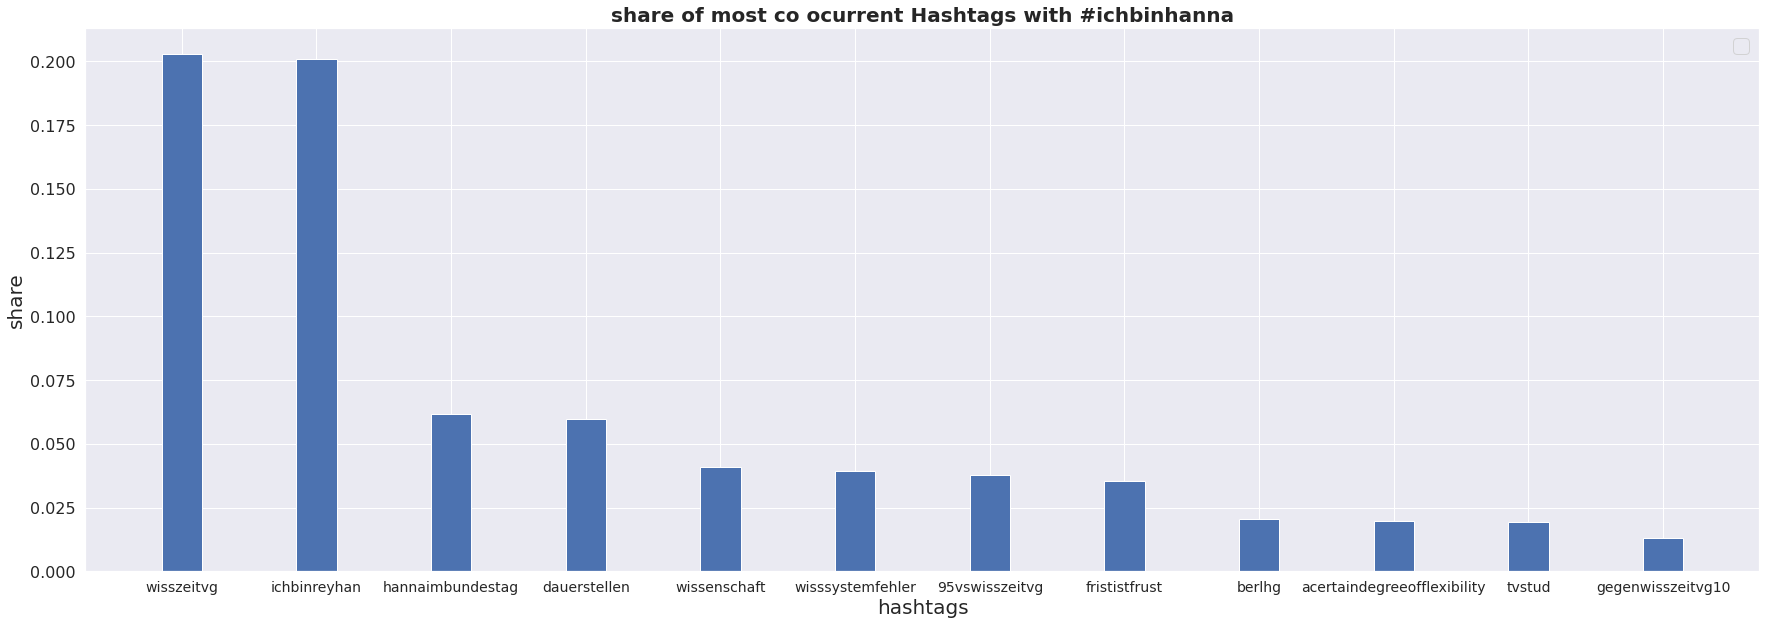

In [ ]:
%matplotlib inline
sns.set(style="darkgrid")
fig = plt.subplots(figsize =(30, 10))
x=[i[0] for i in e][0:12]
y=[i[1] for i in e][0:12]
plt.bar(x,y,width = 0.3)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 20)
plt.xlabel("hashtags",fontsize = 20)
plt.ylabel("share",fontsize = 20)
plt.title("share of most co ocurrent Hashtags with #ichbinhanna",fontsize = 20,fontweight='bold')
plt.show()

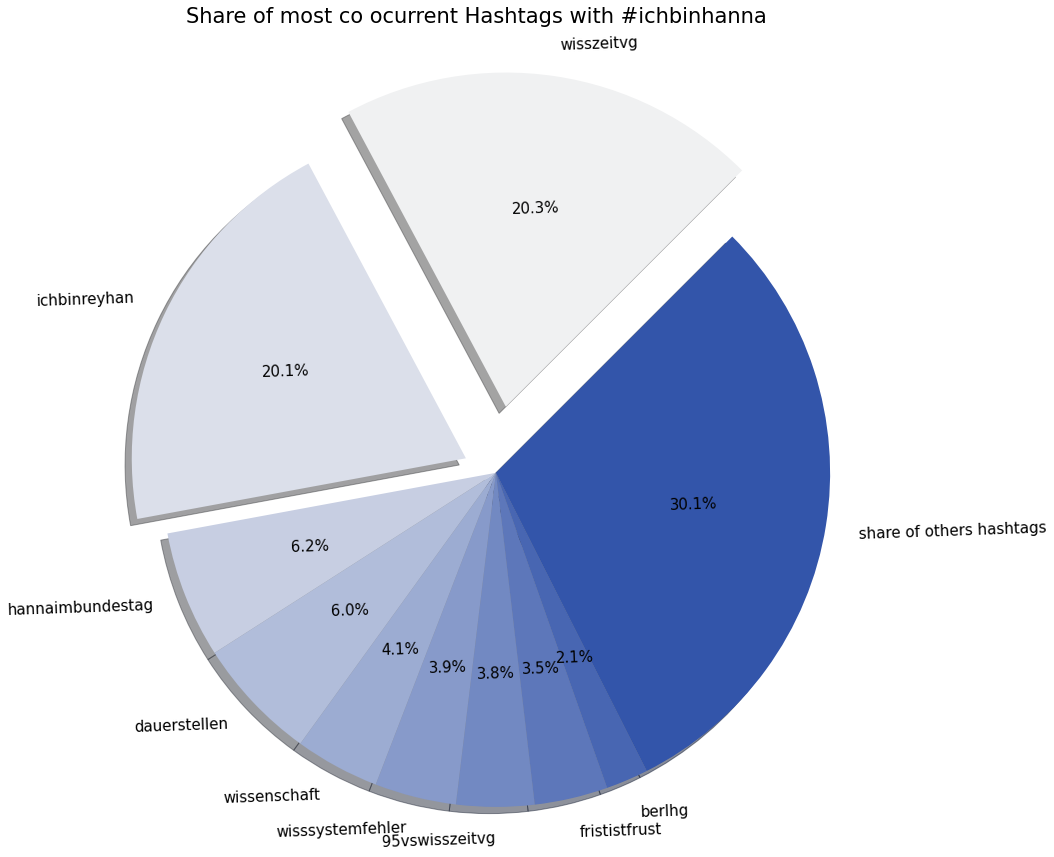

In [ ]:
# declaring data
fig = plt.subplots(figsize =(15, 15))
x=[i[0] for i in e][0:9]
y=[i[1] for i in e][0:9]
x.append("share of others hashtags")

y.append(1-sum(y))
#plt.legend(fontsize = 20)

#plt.title("share of most co ocurrent Hashtags with #ichbinhanna , threshold=2000 frequent",fontsize = 20)
#plt.show()
  
# define Seaborn color palette to use
palette_color = sns.color_palette( "light:#35A9",n_colors=10 )#,as_cmap=True  , blend:#7AB,#EDA   light:#35A9
myexplode = [0.2, 0.1, 0, 0,0,0,0,0,0,0]
# plotting data on chart
plt.pie(y, labels=x, colors=palette_color, autopct='%1.1f%%',shadow=True, startangle=45,explode = myexplode,textprops={'fontsize': 15,'rotation':2})
plt.title("Share of most co ocurrent Hashtags with #ichbinhanna ",fontsize = 21)

plt.axis('equal') 
# displaying chart
plt.show()

In [ ]:
len(myexplode)

12

With wisszeit

In [ ]:
def coocuring_hashtags_with2(dataset,hashtag):#,hashtag
  listOfAllHashtags=list()
  for row, hash in enumerate(dataset.hashtags):
    if dataset['timestamp'][row][0:10]>="2021-06-01" and hash!='[]':
      bb=hash.split(', ') 
      a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
      for i in range(len(a)):
        a[i]=a[i].lower()
      if "ichbinhanna" in a:
        a.remove("ichbinhanna")
      if hashtag in a and len(a)>1:  
        listOfAllHashtags.append(a)
  hashtgs=[]
  for i in listOfAllHashtags:
    hashtgs.extend(i)
  list_of_concurrent_hash=[(i,hashtgs.count(i)/len(listOfAllHashtags)) for i in hashtags_in_DS if hashtgs.count(i)>200 and i.lower()!=hashtag]

  

  return list_of_concurrent_hash


In [ ]:
f=coocuring_hashtags_with(df,'wisszeitvg')
f.sort(reverse=True , key= lambda k:k[1])


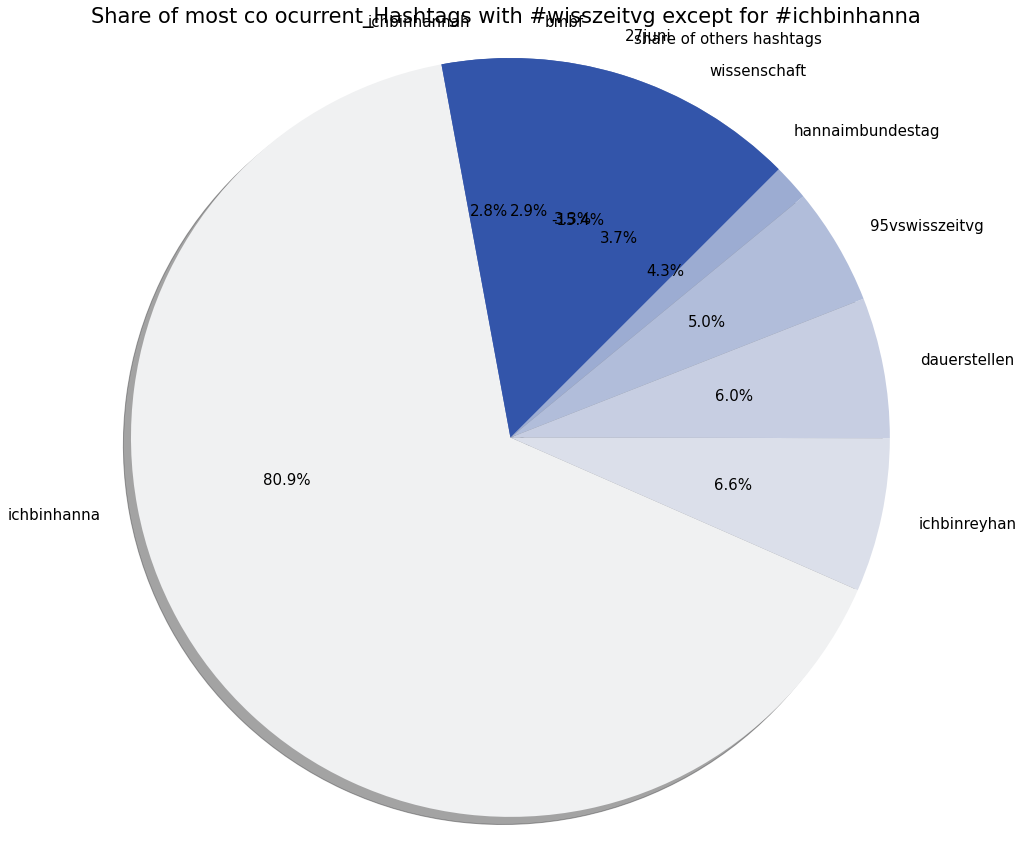

In [ ]:
#fig = plt.subplots(figsize =(12, 7))
fig = plt.subplots(figsize =(15, 15))
x=[i[0] for i in f][0:9]
y=[i[1] for i in f][0:9]

x.append("share of others hashtags")

y.append(1-sum(y))
#plt.legend(fontsize = 20)

#plt.title("share of most co ocurrent Hashtags with #ichbinhanna , threshold=2000 frequent",fontsize = 20)
#plt.show()
  
# define Seaborn color palette to use
palette_color = sns.color_palette( "light:#35A9",n_colors=10 )#,as_cmap=True  , blend:#7AB,#EDA   light:#35A9
myexplode = [0.2, 0, 0, 0,0,0,0,0,0]
# plotting data on chart
plt.pie(y, labels=x, colors=palette_color, autopct='%1.1f%%',shadow=True,explode=myexplode, startangle=45,textprops={'fontsize': 15})
plt.title("Share of most co ocurrent_Hashtags with #wisszeitvg except for #ichbinhanna ",fontsize = 17)

plt.axis('equal') 
# displaying chartmyexplo
plt.show()

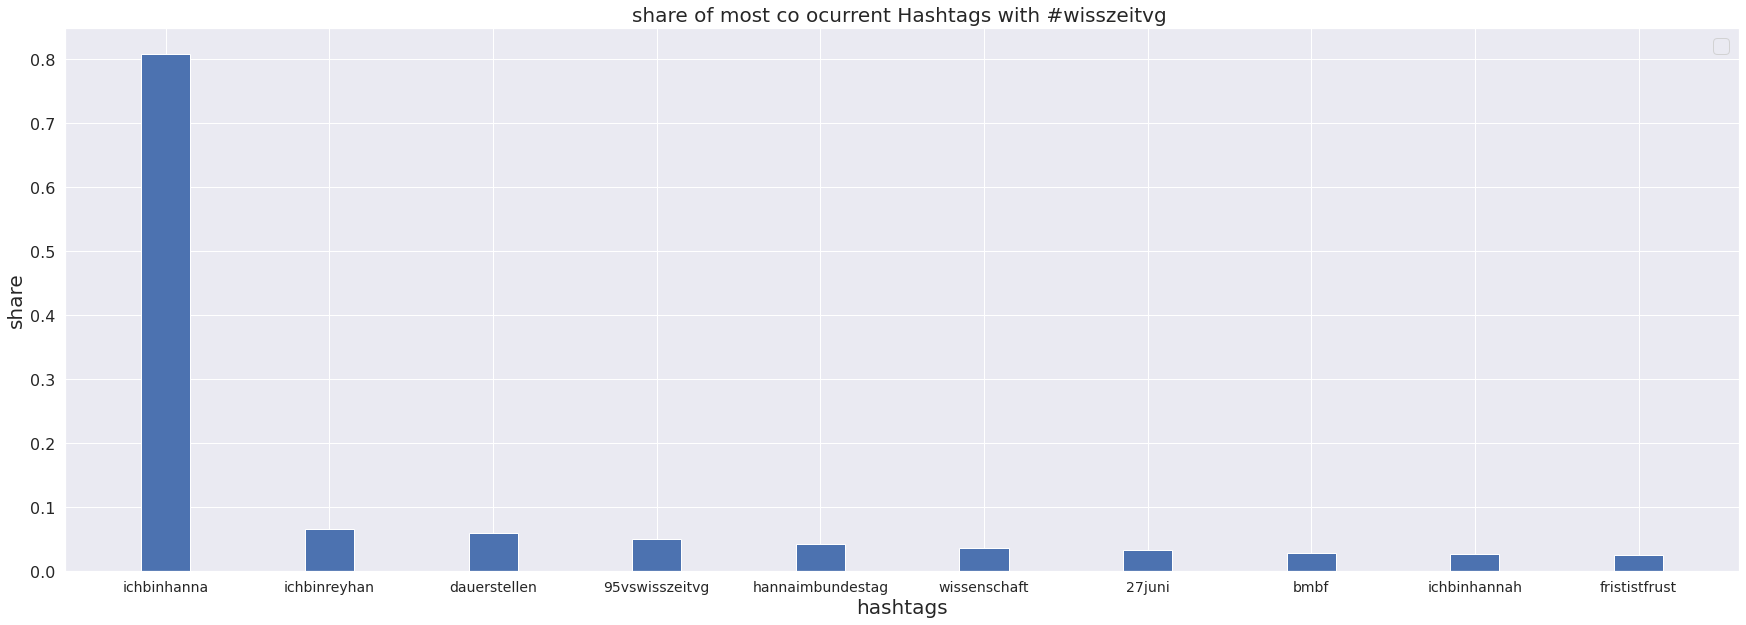

In [ ]:
sns.set(style="darkgrid")
fig = plt.subplots(figsize =(30, 10))
x=[i[0] for i in f][0:15]
y=[i[1] for i in f][0:15]
plt.bar(x,y,width = 0.3)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 16)
plt.legend(fontsize = 20)
plt.xlabel("hashtags",fontsize = 20)
plt.ylabel("share",fontsize = 20)
plt.title("share of most co ocurrent Hashtags with #wisszeitvg ",fontsize = 20)
plt.show()

In [ ]:
len(x)

15

In [ ]:
g=coocuring_hashtags_with2(df,"ichbinreyhan")
g.sort(reverse=True , key= lambda k:k[1])


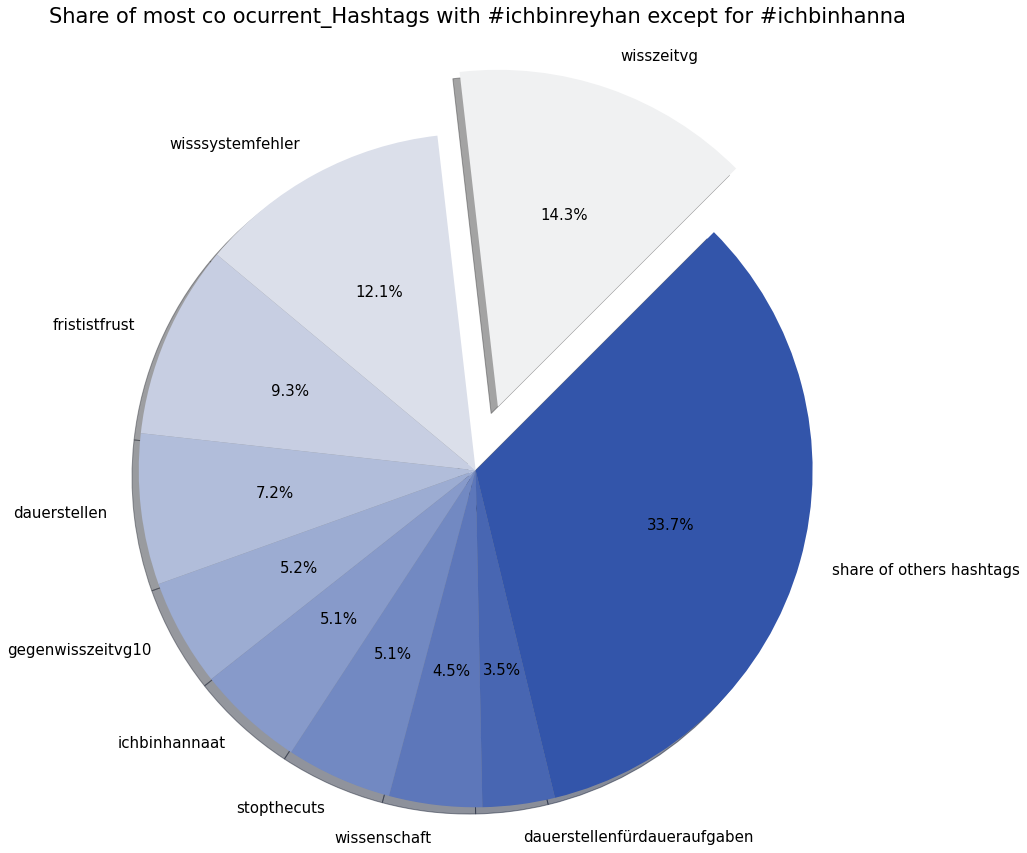

In [ ]:
#fig = plt.subplots(figsize =(12, 7))
fig = plt.subplots(figsize =(15, 15))
x=[i[0] for i in g][0:9]
y=[i[1] for i in g][0:9]

x.append("share of others hashtags")

y.append(1-sum(y))
#plt.legend(fontsize = 20)

#plt.title("share of most co ocurrent Hashtags with #ichbinhanna , threshold=2000 frequent",fontsize = 20)
#plt.show()
  
# define Seaborn color palette to use
palette_color = sns.color_palette( "light:#35A9",n_colors=10 )#,as_cmap=True  , blend:#7AB,#EDA   light:#35A9
myexplode = [0.2, 0, 0, 0,0,0,0,0,0,0]
# plotting data on chart
plt.pie(y, labels=x, colors=palette_color, autopct='%1.1f%%',shadow=True,explode=myexplode, startangle=45,textprops={'fontsize': 15})
plt.title("Share of most co ocurrent_Hashtags with #ichbinreyhan except for #ichbinhanna",fontsize = 21)

plt.axis('equal') 
# displaying chartmyexplo
plt.show()

# wordcloud

In [ ]:
len(x)


9

In [ ]:
list_for_wc

[('ichbinhanna', 206381),
 ('wisszeitvg', 26709),
 ('ichbinreyhan', 17319),
 ('hannaimbundestag', 6078),
 ('dauerstellen', 5997),
 ('wisssystemfehler', 4969),
 ('wissenschaft', 4564),
 ('95vswisszeitvg', 4199),
 ('frististfrust', 3210),
 ('acertaindegreeofflexibility', 2691),
 ('berlhg', 2445),
 ('gegenwisszeitvg10', 2194)]

#trend os hashtags each 3 month

In [ ]:
df = pd.read_parquet('final_twitter_data.parquet')

In [ ]:
df.drop_duplicates(subset=['tweet_id'])

In [ ]:
dates=list()

for row,record in enumerate(df.hashtags):
  if record!='[]'and df['timestamp'][row][0:7]>'2021-05' : 
    dates.append(df['timestamp'][row][0:7])


In [ ]:
date=list()
for dt in dates:
  if dt not in date:
    date.append(dt)


In [ ]:
date.sort()
date

In [ ]:
date_each3= [dt for row, dt in enumerate(date) if row%3==0]

In [ ]:
date_each3

['2021-06', '2021-09', '2021-12', '2022-03', '2022-06', '2022-09']

In [ ]:
i=1
j=6
for i in range(1,3):
  for j in range(1,13):
    if i==1 and j>5 and j<10 or i==2 and j<10:
      globals()[f'hash202{i}_0{j}']=list()
      globals()[f'hash202{i}_0{j}'].extend([hash for row,hash in enumerate(df['hashtags']) if df['timestamp'][row][0:7]==f'202{i}-0{j}' and hash!='[]'])
        
    elif i==1 and j>5 and j>=10 or i==2 and j>=10:
      globals()[f'hash202{i}_{j}']=list()
      globals()[f'hash202{i}_{j}'].extend([hash for row,hash in enumerate(df['hashtags']) if df['timestamp'][row][0:7]==f'202{i}-{j}' and hash!='[]'])

In [ ]:
#preprocessing the hashtags list from specific periods
i=1
j=6
for i in range(1,3):
  for j in range(1,13):
    if i==1 and j>5 and j<10 or i==2 and j<10:
      globals()[f'all_hashtags_202{i}_0{j}']=list()
      for s in globals()[f'hash202{i}_0{j}']:
          bb=s.split(', ')
          a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
          globals()[f'all_hashtags_202{i}_0{j}'].extend(a)
        
        
    elif i==1 and j>5 and j>=10 or i==2 and j>=10:
      globals()[f'all_hashtags_202{i}_{j}']=list()
      for s in globals()[f'hash202{i}_{j}']:
          bb=s.split(', ')
          a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
          globals()[f'all_hashtags_202{i}_{j}'].extend(a)

In [ ]:
def hashtag_counter(hash_ls,txt):
  lis=list()
  for hashtag in hash_ls:
    lis.append(hashtag.lower())
  return lis.count(txt.lower())

In [ ]:
def hashtag_num_list(hashtag):
  hashtag_num=list()
  for dt in date_each3:
      i,j = dt[3],dt[5:]
      lis = globals()[f'all_hashtags_202{i}_{j}']
      hashtag_num.append(hashtag_counter(lis,hashtag))
  return hashtag_num

In [ ]:
hashtag_num_list("ichbinhanna")

[77842, 10486, 5111, 4645, 9299, 3783]

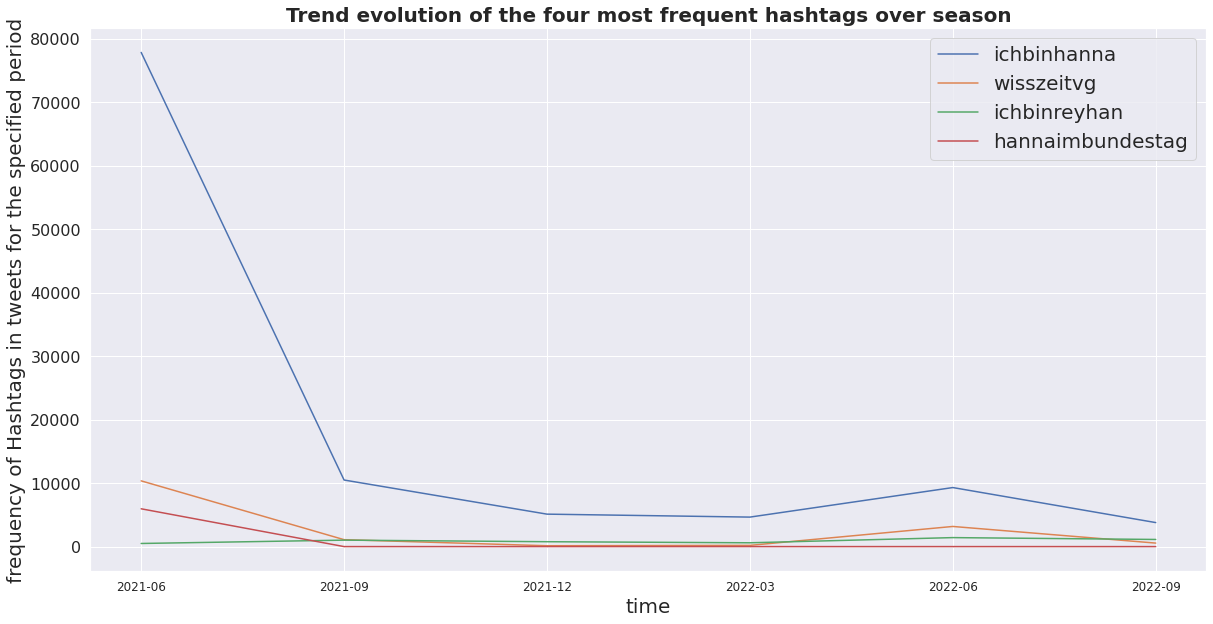

In [ ]:
%matplotlib inline
sns.set(style="darkgrid")
#hashlist_from_database=hashlist_from_database[0:4]
fig = plt.figure(figsize = (20, 10))
for i in hashlist_from_database:
  plt.plot(date_each3,hashtag_num_list(i))#/summ

plt.legend([j for j in hashlist_from_database ], fontsize=20) 
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 16)

plt.xlabel("time",fontsize = 20)
plt.ylabel("frequency of Hashtags in tweets for the specified period",fontsize = 20)
plt.title("Trend evolution of the four most frequent hashtags over season",fontsize = 20,fontweight='bold')
plt.show()



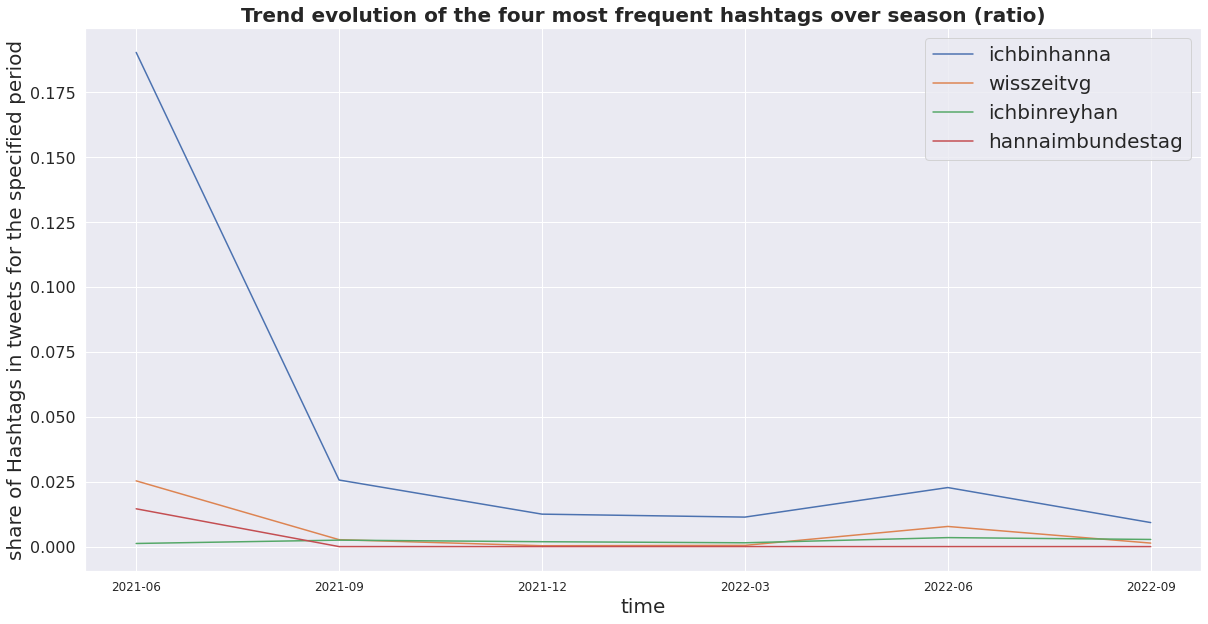

In [ ]:

#hashlist_from_database=hashlist_from_database[0:4]
fig = plt.figure(figsize = (20, 10))
for i in hashlist_from_database:
  plt.plot(date_each3,np.array(hashtag_num_list(i))/np.size(lis))#/summ

plt.legend([j for j in hashlist_from_database ], fontsize=20) 
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 16)

plt.xlabel("time",fontsize = 20)
plt.ylabel("share of Hashtags in tweets for the specified period",fontsize = 20)
plt.title("Trend evolution of the four most frequent hashtags over season (ratio)",fontsize = 20,fontweight='bold')
plt.show()



<ipython-input-45-8e328c6c798a>:4: RuntimeWarning: divide by zero encountered in log
  plt.plot(date_each3,np.array(np.log(hashtag_num_list(i))/np.size(lis)))#/summ


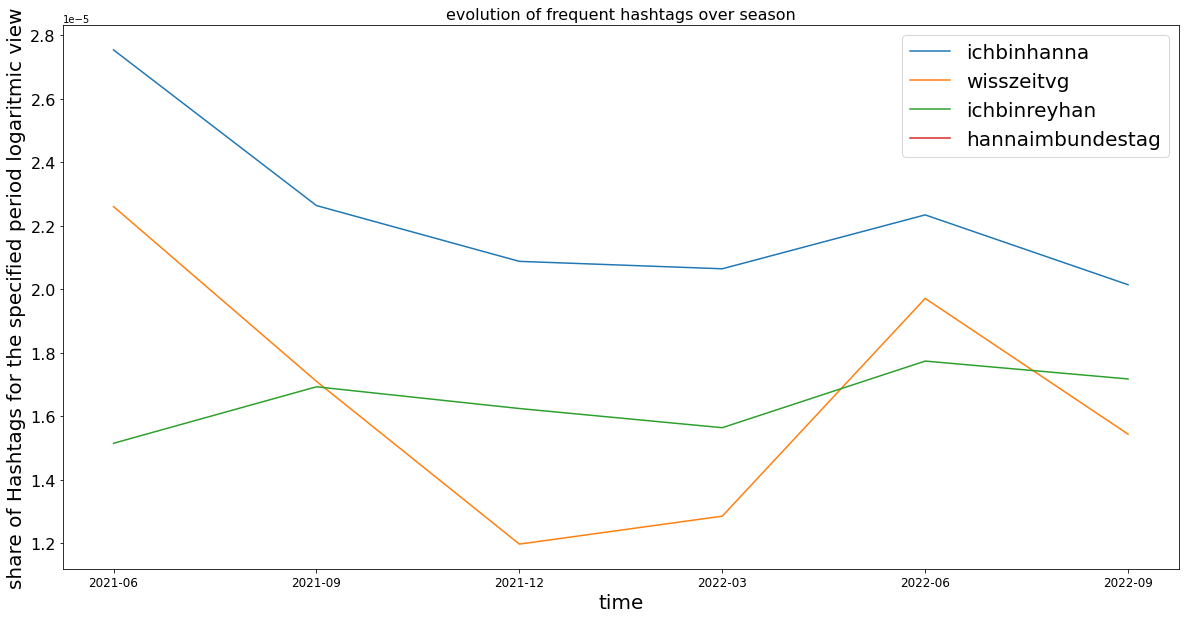

In [ ]:
#hashlist_from_database=hashlist_from_database[0:4]
fig = plt.figure(figsize = (20, 10))
for i in hashlist_from_database:
  plt.plot(date_each3,np.array(np.log(hashtag_num_list(i))/np.size(lis)))#/summ

plt.legend([j for j in hashlist_from_database ], fontsize=20) 
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 16)

plt.xlabel("time",fontsize = 20)
plt.ylabel("share of Hashtags for the specified period logaritmic view",fontsize = 20)
plt.title("evolution of frequent hashtags over season",fontsize = 16)
plt.show()



# coocurring hashtags plot over time


In [ ]:
def coocuring_hashtags_with(dataset,hashtag):#,hashtag
  listOfAllHashtags=list()
  for row, hash in enumerate(dataset.hashtags):
    if dataset['timestamp'][row][0:10]>="2021-06-01" and hash!='[]':
      bb=hash.split(', ') 
      a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
      for i in range(len(a)):
        a[i]=a[i].lower()
      if hashtag in a and len(a)>1:  
        listOfAllHashtags.append(a)
  hashtgs=[]
  for i in listOfAllHashtags:
    hashtgs.extend(i)
  list_of_concurrent_hash=[(i,hashtgs.count(i)/len(listOfAllHashtags)) for i in hashtags_in_DS if hashtgs.count(i)>2000 and i.lower()!=hashtag]

  

  return list_of_concurrent_hash


In [ ]:
h=coocuring_hashtags_with(df,"ichbinhanna")
h.sort(reverse=True , key= lambda k:k[1])

In [ ]:
h

[('wisszeitvg', 0.20308754086451145),
 ('ichbinreyhan', 0.20098074827460952),
 ('hannaimbundestag', 0.061557089235984984),
 ('dauerstellen', 0.05981353674779029),
 ('wissenschaft', 0.040985591475965616),
 ('wisssystemfehler', 0.03943576704201477),
 ('95vswisszeitvg', 0.037667998547039595),
 ('frististfrust', 0.03542801791984502)]

In [ ]:
hashlis2=[i[0] for i in h]

In [ ]:
hashlis2

['wisszeitvg',
 'ichbinreyhan',
 'hannaimbundestag',
 'dauerstellen',
 'wissenschaft',
 'wisssystemfehler',
 '95vswisszeitvg',
 'frististfrust']

In [ ]:

i=1
j=6
for i in range(1,3):
  for j in range(1,13):
    if i==1 and j>5 and j<10 or i==2 and j<10:
      globals()[f'hash202{i}_0{j}']=list()
      globals()[f'hash202{i}_0{j}'].extend([hash for row,hash in enumerate(df['hashtags']) if df['timestamp'][row][0:7]==f'202{i}-0{j}' and hash!='[]' and "ichbinhanna" in hash] )
        
    elif i==1 and j>5 and j>=10 or i==2 and j>=10:
      globals()[f'hash202{i}_{j}']=list()
      globals()[f'hash202{i}_{j}'].extend([hash for row,hash in enumerate(df['hashtags']) if df['timestamp'][row][0:7]==f'202{i}-{j}' and hash!='[]' and "ichbinhanna" in hash])
i=1
j=6
for i in range(1,3):
  for j in range(1,13):
    if i==1 and j>5 and j<10 or i==2 and j<10:
      globals()[f'all_hashtags_202{i}_0{j}']=list()
      for s in globals()[f'hash202{i}_0{j}']:
          bb=s.split(', ')
          a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
          globals()[f'all_hashtags_202{i}_0{j}'].extend(a)
        
        
    elif i==1 and j>5 and j>=10 or i==2 and j>=10:
      globals()[f'all_hashtags_202{i}_{j}']=list()
      for s in globals()[f'hash202{i}_{j}']:
          bb=s.split(', ')
          a=[re.search(r"[\[\']*(\w*)[\]\']*",i).group(1) for i in bb]
          globals()[f'all_hashtags_202{i}_{j}'].extend(a)




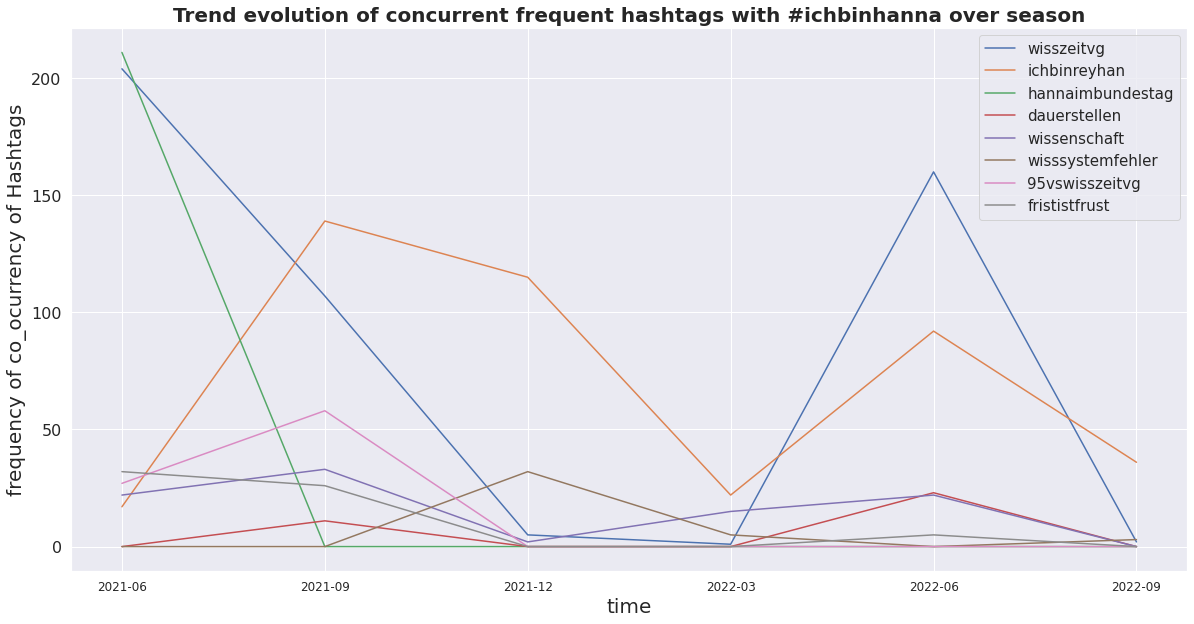

In [ ]:
fig = plt.figure(figsize = (20, 10))
for i in hashlis2:
  plt.plot(date_each3,hashtag_num_list(i))#/summ

plt.legend([j for j in hashlis2 ], fontsize=15) 
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 16)

plt.xlabel("time",fontsize = 20)
plt.ylabel("frequency of co_ocurrency of Hashtags",fontsize = 20)
plt.title("Trend evolution of concurrent frequent hashtags with #ichbinhanna over season",fontsize = 20,fontweight='bold')
plt.show()


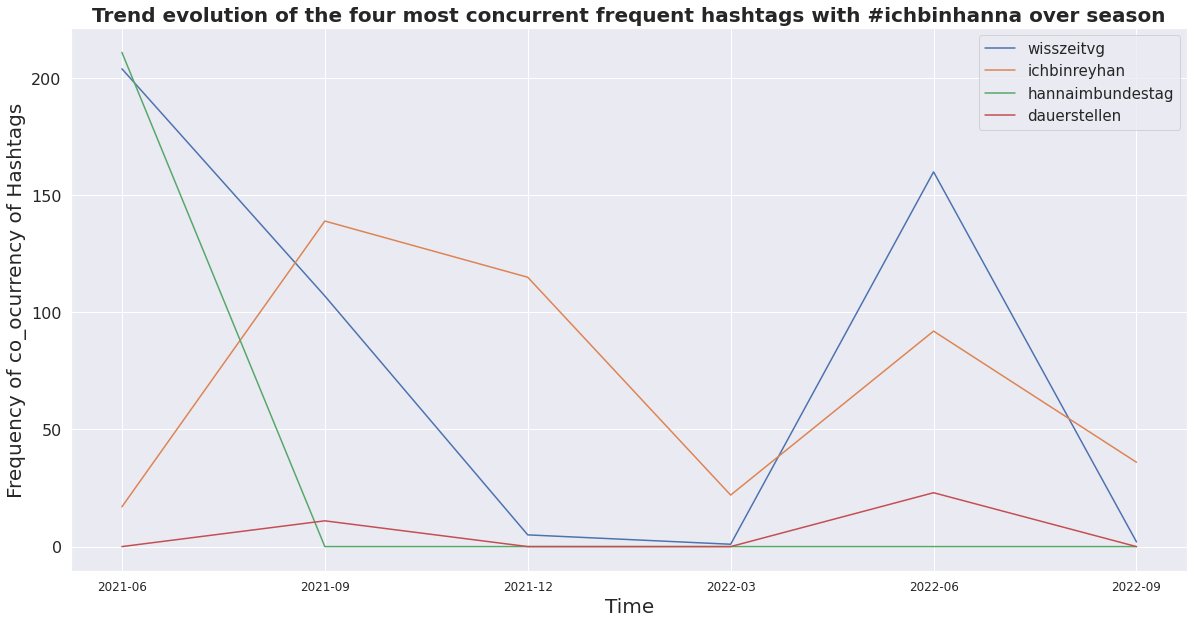

In [ ]:
fig = plt.figure(figsize = (20, 10))
hashlis3=hashlis2[0:4]
for i in hashlis3:
  plt.plot(date_each3,hashtag_num_list(i))#/summ

plt.legend([j for j in hashlis2 ], fontsize=15) 
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 16)

plt.xlabel("Time",fontsize = 20)
plt.ylabel("Frequency of co_ocurrency of Hashtags",fontsize = 20)
plt.title("Trend evolution of the four most concurrent frequent hashtags with #ichbinhanna over season",fontsize = 20,fontweight='bold')
plt.show()
